# Apartat C

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, sep=';')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Rahan.csv')

# quitar columnas vacias
dataset = dataset.dropna(axis=1, how='all')

data = dataset.values

# Atributo objetivo: PM10
target_index = 6

dates = data[:, 0]
x = data[:, [1, 2, 3, 4, 5]]
y = data[:, target_index]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (16393, 8)
Dimensionalitat de les entrades X (16393, 5)
Dimensionalitat de l'atribut Y (16393,)


In [2]:
dataset.head()

,Time,air_temperature,dewpoint,wind_direction,wind_speed,ambient_pressure,PM10,PM2.5
0,02/19/2017 11:00,-5.420,-13.110,175.380,0.820,"873,97",5.360,1.410
1,02/19/2017 12:00,-5.220,-12.250,185.490,1.520,"873,12",5.300,1.510
2,02/19/2017 13:00,-4.680,-11.390,189.920,1.390,"872,14",4.390,1.690
3,02/19/2017 14:00,-4.100,-10.690,200.580,1.530,"871,56",3.940,1.580
4,02/19/2017 15:00,-3.570,-10.700,191.310,1.500,"871,13",3.440,1.500


In [3]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Time                  0
air_temperature     198
dewpoint            198
wind_direction      198
wind_speed          198
ambient_pressure    222
PM10                  1
PM2.5                 1
dtype: int64


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16393 entries, 0 to 16392
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              16393 non-null  object 
 1   air_temperature   16195 non-null  float64
 2   dewpoint          16195 non-null  float64
 3   wind_direction    16195 non-null  float64
 4   wind_speed        16195 non-null  float64
 5   ambient_pressure  16171 non-null  object 
 6   PM10              16392 non-null  float64
 7   PM2.5             16392 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


In [5]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,air_temperature,dewpoint,wind_direction,wind_speed,PM10,PM2.5
count,16195.000,16195.000,16195.000,16195.000,16392.000,16392.000
mean,15.717,2.399,135.413,2.005,36.834,12.735
std,10.097,5.428,111.880,1.428,160.135,156.523
min,-9.760,-23.640,0.000,0.010,-9999.000,-9999.000
25%,7.460,-1.425,21.770,0.810,25.517,12.080
50%,15.350,2.280,151.670,1.720,31.030,13.470
75%,23.820,6.600,213.400,2.970,42.230,16.142
max,39.710,14.930,359.990,10.760,1167.600,88.110


<IPython.core.display.Javascript object>


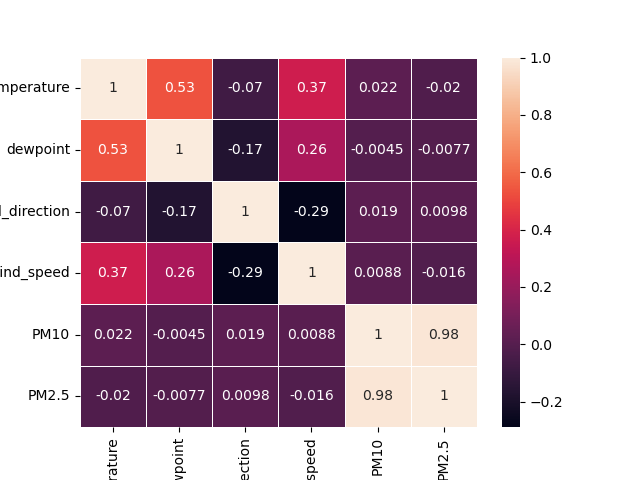

In [6]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


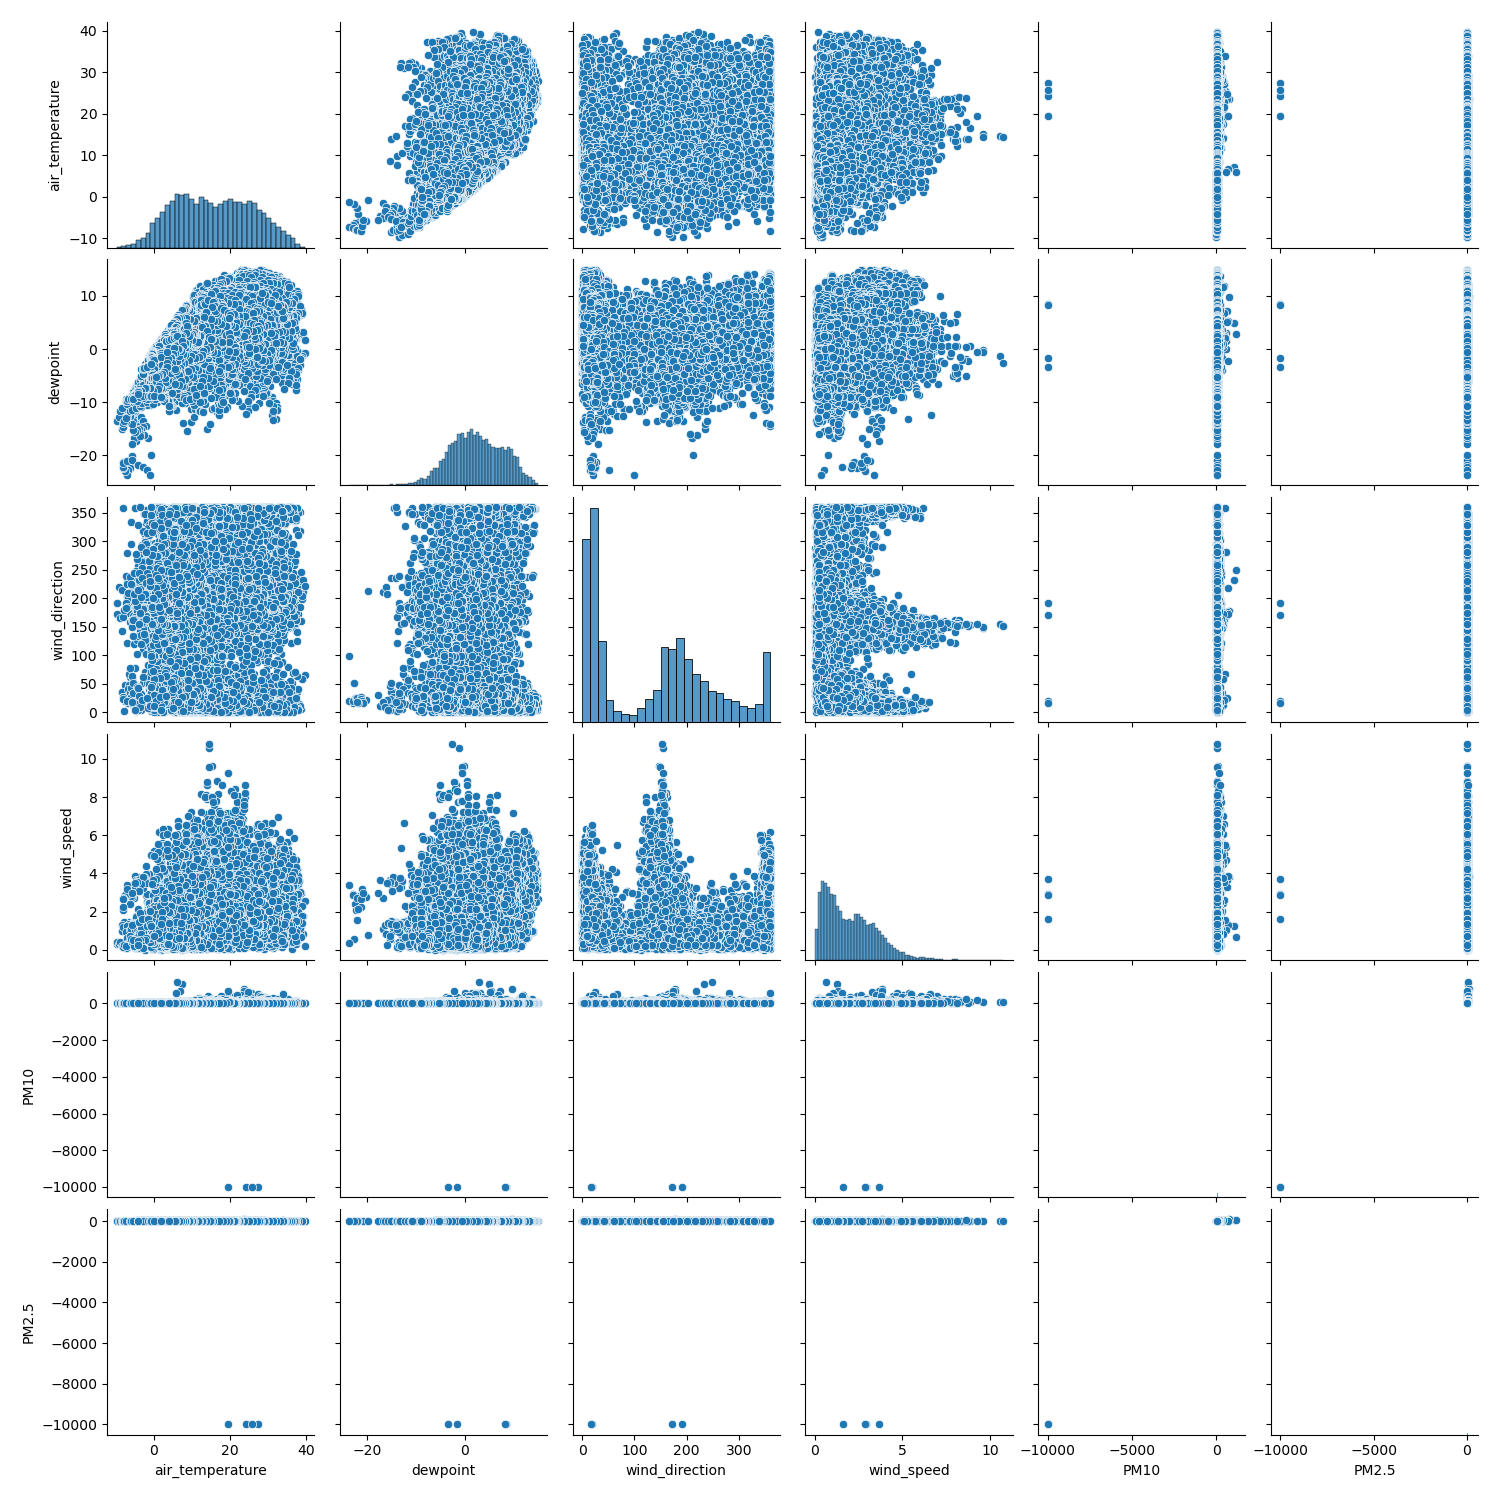

In [7]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

In [8]:
# quitar valores nulos

arr = data
# Get boolean index list of rows with True values for the rows
# that has any NaN values
indexList = [np.any(i) for i in pd.isna(arr)]
# delete all the rows with any NaN value
x = np.delete(x, indexList, axis=0)
y = np.delete(y, indexList, axis=0)
dates = np.delete(dates, indexList, axis=0)
print(arr.shape[0])
print(x.shape[0])
print(y.shape[0])

16393
15972
15972


In [9]:
# quitar -9999s

list_9999 = []

for i in range(y.shape[0]):
    if y[i] < 0:
        list_9999.append(i)
        
x = np.delete(x, list_9999, axis=0)
y = np.delete(y, list_9999, axis=0)
dates = np.delete(dates, list_9999, axis=0)
print(x.shape)
print(y.shape)

(15968, 5)
(15968,)


In [10]:
# sustituir str por float del atributo 4

print(x)
print(type(x[0, 4]))
for sample in x:
    sample[4] = float(sample[4][:3]+'.'+sample[4][4:])
print(type(x[0][4]))

[[-5.42 -13.11 175.38 0.82 '873,97']
 [-5.22 -12.25 185.49 1.52 '873,12']
 [-4.68 -11.39 189.92 1.39 '872,14']
 ...
 [-0.5 -0.79 185.25 0.65 '861,20']
 [-0.51 -0.97 199.86 1.06 '860,67']
 [-0.64 -1.23 193.34 0.62 '859,72']]
<class 'str'>
<class 'float'>


<IPython.core.display.Javascript object>


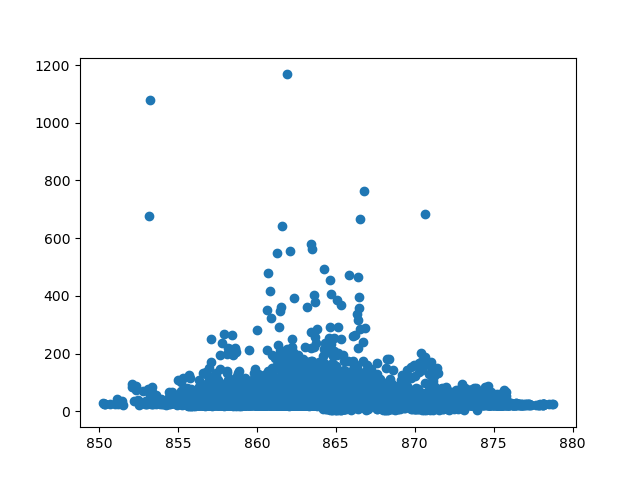

In [11]:
# mostrem atribut 
#################    HAY QUE MODIFICAR X, Y DEL DATA    !!!!!!!!!!!!!!!!!!
plt.figure()

ax = plt.scatter(x[:,4], y)

<IPython.core.display.Javascript object>


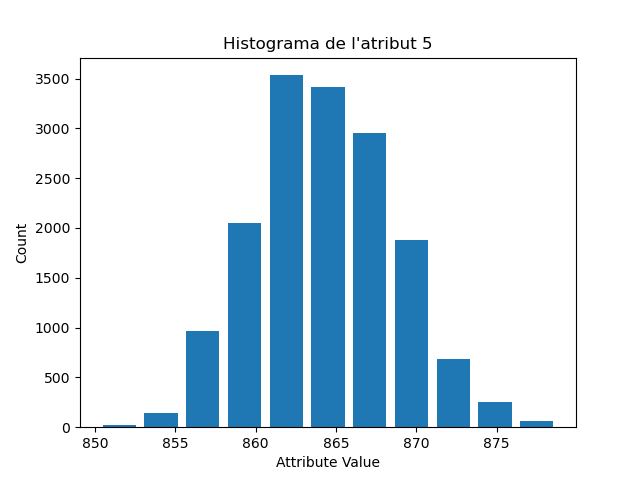

In [12]:
plt.figure()
plt.title("Histograma de l'atribut 5")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,4], bins=11, range=[np.min(x[:,4]), np.max(x[:,4])], histtype="bar", rwidth=0.8)


In [13]:
# ver correlación

yc = []
for i in y:
    yc.append(i)
    
for i in range(x.shape[1]):
    print("correlation atributo ", i)
    aux = []
    for i in x[:,i]:
        aux.append(i)
    print(np.corrcoef(aux, yc)[0][1])

correlation atributo  0
0.16982810819112837
correlation atributo  1
-0.024526784149117596
correlation atributo  2
0.07019370202262887
correlation atributo  3
0.08382195936514487
correlation atributo  4
-0.07642113348664395


<IPython.core.display.Javascript object>


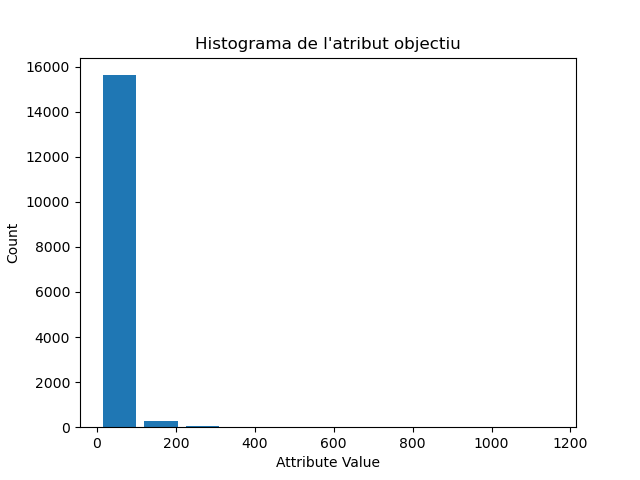

In [14]:
plt.figure()
plt.title("Histograma de l'atribut objectiu")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=11, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)


In [15]:
# mirando el histograma se puede observar outliers a partir de 300

y_outliers = []
for i in range(len(y)):
    if y[i] > 300:
        y_outliers.append(i)
print(y_outliers)

[287, 288, 345, 346, 1306, 1873, 1933, 1952, 1953, 1957, 1958, 1959, 1976, 2050, 2051, 2052, 2053, 2122, 2123, 2367, 2368, 2571, 2572, 2573, 2574, 2575, 3671, 3751, 4058, 4064, 5502, 9329]


In [16]:
# borramos esos outliers

print(x.shape)
print(y.shape)
x = np.delete(x, y_outliers, axis=0)
y = np.delete(y, y_outliers, axis=0)
dates = np.delete(dates, y_outliers, axis=0)
print(x.shape)
print(y.shape)

(15968, 5)
(15968,)
(15936, 5)
(15936,)


<IPython.core.display.Javascript object>


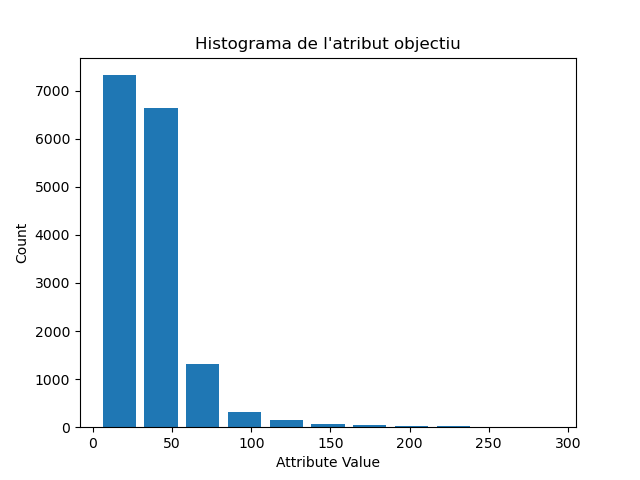

In [17]:
plt.figure()
plt.title("Histograma de l'atribut objectiu")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(y, bins=11, range=[np.min(y), np.max(y)], histtype="bar", rwidth=0.8)


In [18]:
yv = np.vstack(y)
df_array = np.concatenate([x, yv], axis=1)
index = ['air_temperature', 'dewpoint', 'wind_direction', 'wind_speed', 'ambient_pressure', 'PM10']
df = pd.DataFrame(df_array, columns=index).astype(float)
print(df)

       air_temperature  dewpoint  wind_direction  wind_speed  \
0               -5.420   -13.110         175.380       0.820   
1               -5.220   -12.250         185.490       1.520   
2               -4.680   -11.390         189.920       1.390   
3               -4.100   -10.690         200.580       1.530   
4               -3.570   -10.700         191.310       1.500   
...                ...       ...             ...         ...   
15931           -0.510    -0.610         170.300       1.070   
15932           -0.540    -0.700         197.650       0.690   
15933           -0.500    -0.790         185.250       0.650   
15934           -0.510    -0.970         199.860       1.060   
15935           -0.640    -1.230         193.340       0.620   

       ambient_pressure   PM10  
0               873.970  5.360  
1               873.120  5.300  
2               872.140  4.390  
3               871.560  3.940  
4               871.130  3.440  
...                 ...    ...  


<IPython.core.display.Javascript object>


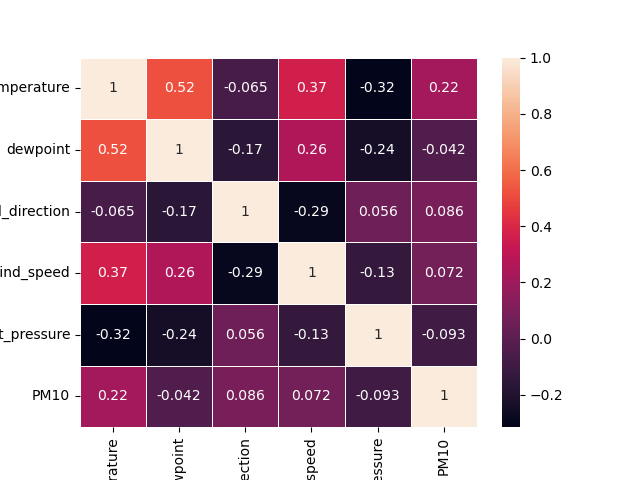

In [19]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


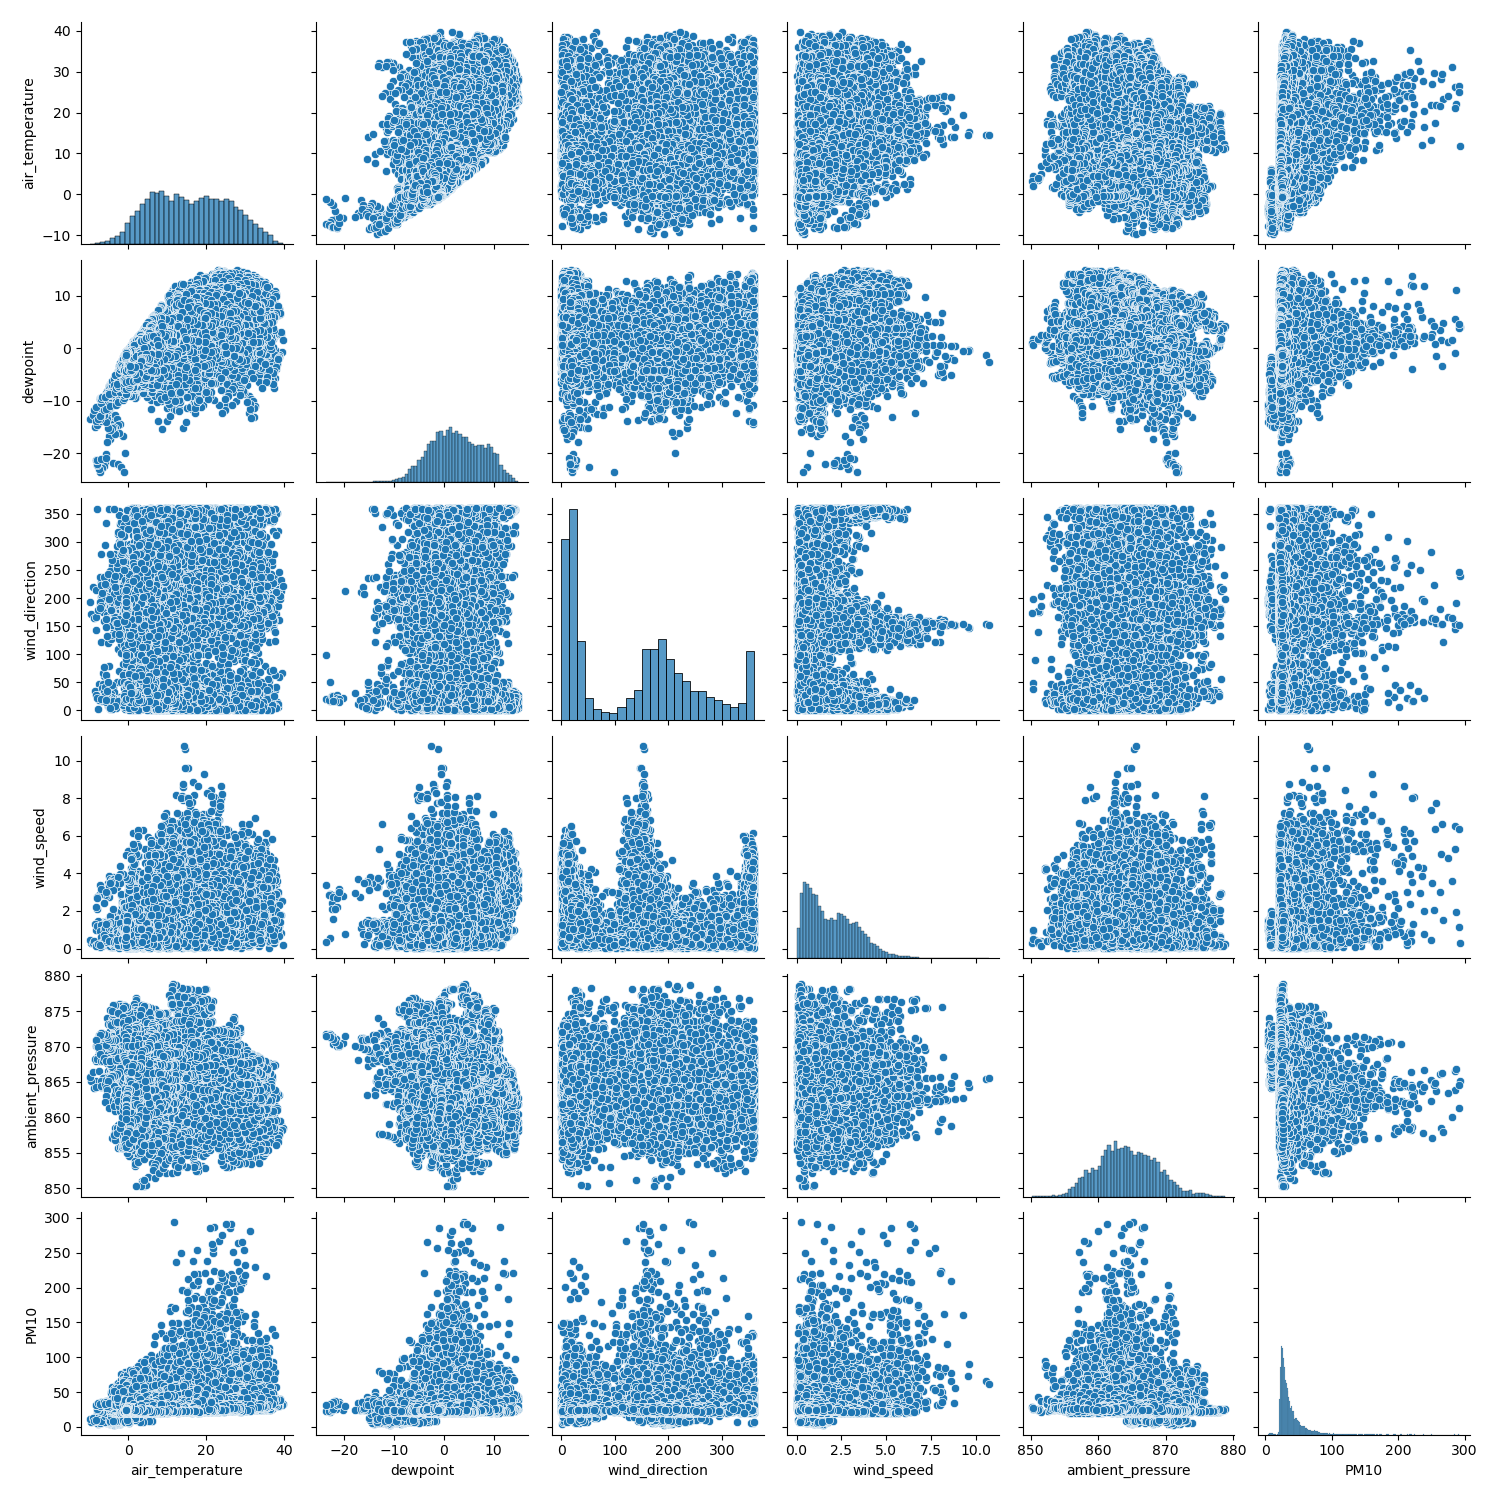

In [20]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(df)

In [21]:
# resumen x e y

print("Dimensionalitat de x: ", x.shape)
print("Dimensionalitat de y: ", y.shape)

Dimensionalitat de x:  (15936, 5)
Dimensionalitat de y:  (15936,)


## Apartat B

In [22]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])

import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


In [23]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = np.std(x_train)
    x_t = x_train - mean[None, :]
    x_t /= std
    return x_t

x_n = standarize(x)

<IPython.core.display.Javascript object>


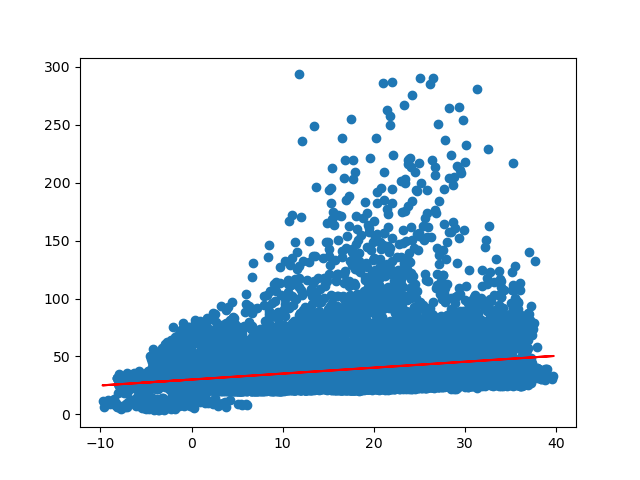

Mean squeared error:  527.041854011107
R2 score:  0.04742834590196754


<IPython.core.display.Javascript object>


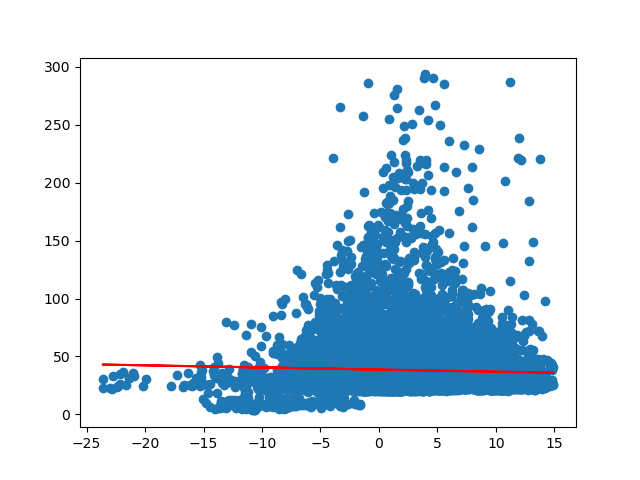

Mean squeared error:  552.3163172485347
R2 score:  0.0017474629335980651


<IPython.core.display.Javascript object>


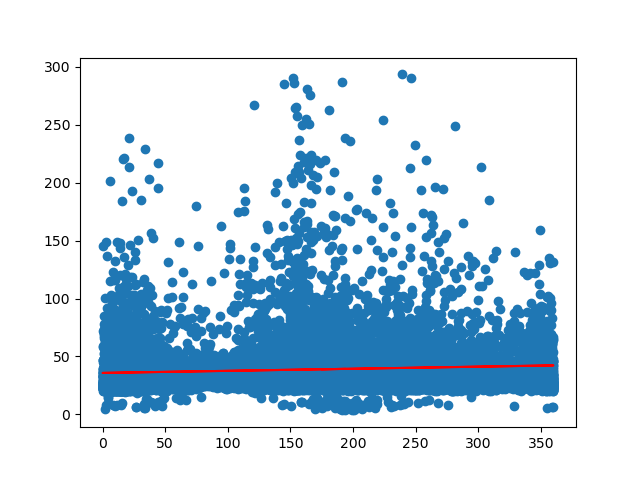

Mean squeared error:  549.1861908814461
R2 score:  0.007404830803615647


<IPython.core.display.Javascript object>


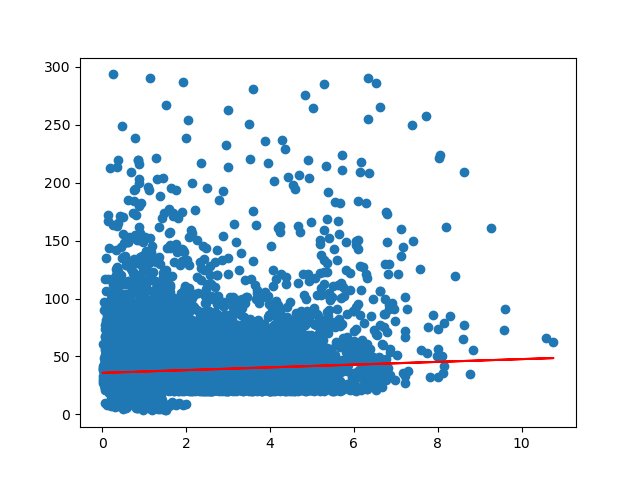

Mean squeared error:  550.437893408366
R2 score:  0.005142512664296883


<IPython.core.display.Javascript object>


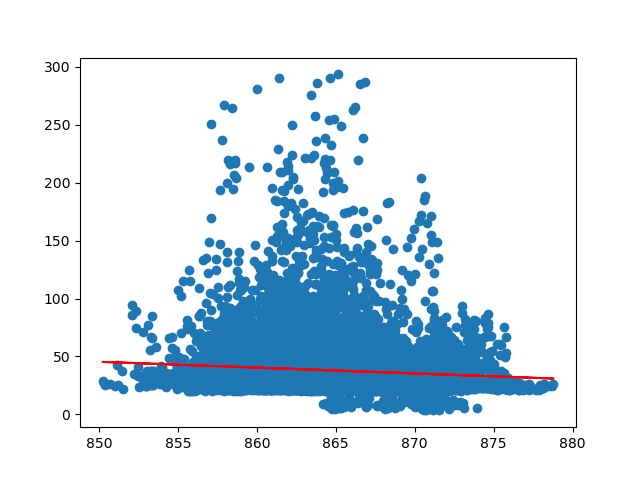

Mean squeared error:  548.5457116605465
R2 score:  0.00856242833826526


In [24]:
from sklearn.metrics import r2_score

for i in range(x.shape[1]):
    # Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
    # En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
    atribut1 = x[:,i].reshape(x.shape[0], 1) 
    regr = regression(atribut1, y) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(atribut1[:,0], predicted, 'r')

    # Mostrem l'error (MSE i R2)
    MSE = mse(y, predicted)
    r2 = r2_score(y, predicted)

    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)


<IPython.core.display.Javascript object>


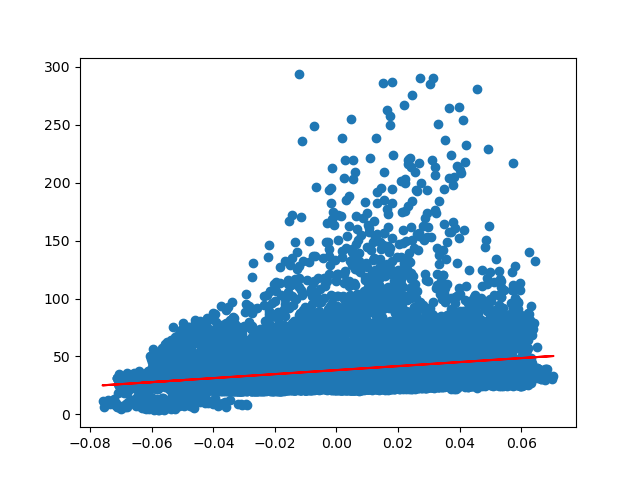

Mean squeared error:  527.041854011107
R2 score:  0.04742834590196754


<IPython.core.display.Javascript object>


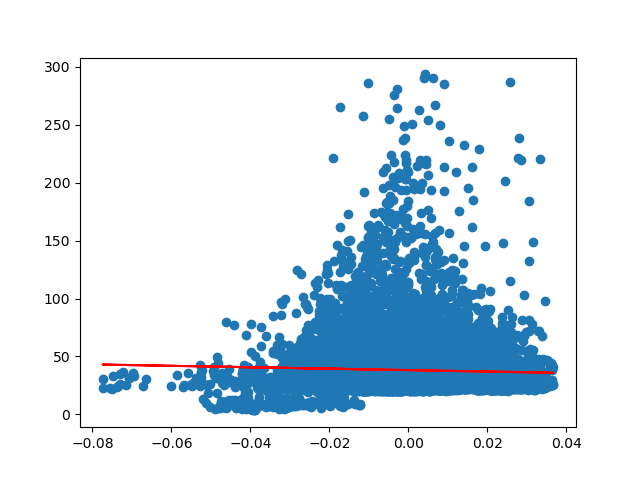

Mean squeared error:  552.3163172485347
R2 score:  0.0017474629335980651


<IPython.core.display.Javascript object>


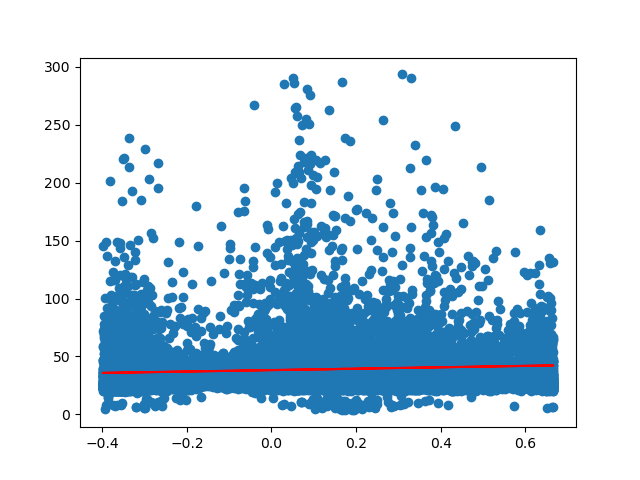

Mean squeared error:  549.1861908814462
R2 score:  0.007404830803615425


<IPython.core.display.Javascript object>


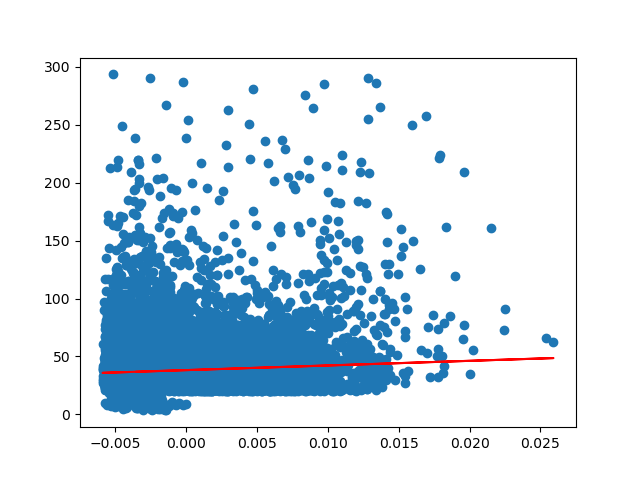

Mean squeared error:  550.437893408366
R2 score:  0.005142512664296883


<IPython.core.display.Javascript object>


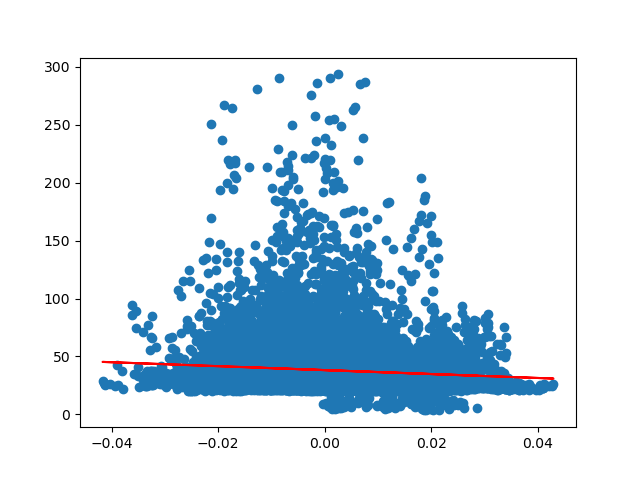

Mean squeared error:  548.5457116605464
R2 score:  0.00856242833826526


In [25]:
from sklearn.metrics import r2_score

for i in range(x.shape[1]):
    # Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
    # En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
    atribut1 = x_n[:,i].reshape(x.shape[0], 1) 
    regr = regression(atribut1, y) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    plt.figure()
    ax = plt.scatter(x_n[:,i], y)
    plt.plot(atribut1[:,0], predicted, 'r')

    # Mostrem l'error (MSE i R2)
    MSE = mse(y, predicted)
    r2 = r2_score(y, predicted)

    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)


In [26]:
# Apliquem la funció PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

PCAA = pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)

[0.94757532 0.0417576 ]


In [27]:
print(df.shape)
print(PCAA.shape)

(15936, 6)
(15936, 2)
